# Data Science and Business Analytics Internship

## GRIP : The Sparks Foundation

## Author : Navnath Satre
## Task 1 : Prediction using Supervised ML

### This is a simple linear regression task as it involves just 2 variables.

**Q) Predict the percentage of an student based on the no. of study hours.**

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing the data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print('Data Read Successfully')

Data Read Successfully


In [3]:
# see the first 5 records in the data set
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# More Information about our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There is no null values in our data**

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the data set

**we will try to find the relationship in our data**

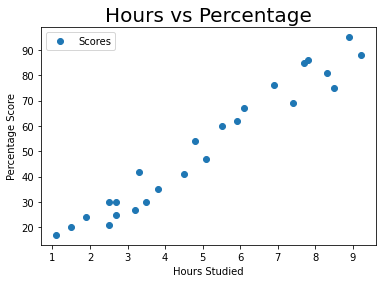

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
# ploting the distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
df.corr()

from above graph, we can clearly see that **Positive Linear relation** between no. of hours studied and percentage score.

In [8]:
import warnings
warnings.filterwarnings('ignore')

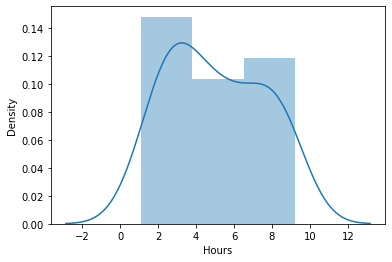

In [9]:
# check the normality
sns.distplot(df['Hours'])
plt.show()

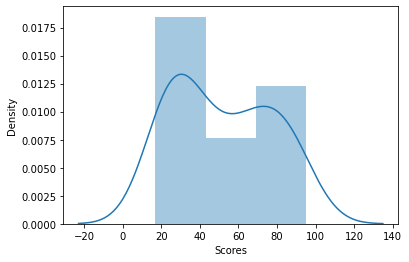

In [10]:
sns.distplot(df['Scores'])
plt.show()

### Preparing the data 
Divide the data into attributes(inputs) and labels(outputs)

In [11]:
X = df.iloc[:, :-1].values  #attribute
y = df.iloc[:, 1].values    #label

Now split this data into training and test sets, We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) #for training=80% and for testing=20%

### Training tha Algorithm

We will use Linear Regression which is supervised ML Algorithm

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


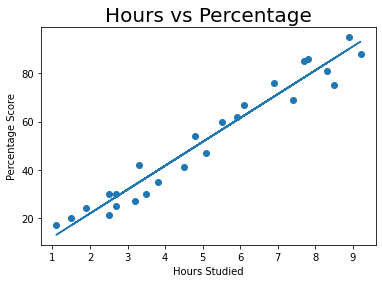

In [14]:
# ploting the regression line
line = regressor.coef_ * X + regressor.intercept_

plt.scatter(X,y)
plt.plot(X,line,)
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Making Predictions

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})  
df 

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**we can check train and test score**

In [17]:
print("Train score : ",regressor.score(X_train, y_train))
print("Test score : ",regressor.score(X_test, y_test))

Train score :  0.9515510725211552
Test score :  0.9454906892105356


**we can plot Actual vs Predicted marks**

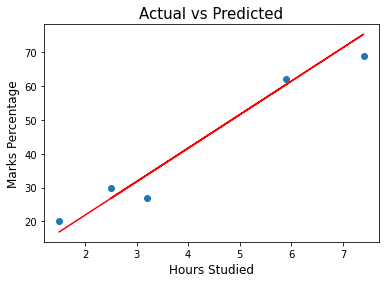

In [18]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='r')
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the Model

In [19]:
from sklearn import metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.<br />
You can also predict the marks by giving the input of number of hours studied.<br />
For example: What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [20]:
hours = [9.25]
Answer = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(Answer[0],2)))

No of Hours = [9.25]
Predicted Score = 93.69
